In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

data = pd.read_csv("PS_2023.02.01_18.28.47.csv",comment='#')

def names(dataframe):
    for p in dataframe.keys():
        print(format(p))

In [2]:
names(data)

pl_name
hostname
tic_id
default_flag
sy_snum
sy_pnum
discoverymethod
disc_year
disc_facility
tran_flag
soltype
pl_controv_flag
pl_refname
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_radj
pl_radjerr1
pl_radjerr2
pl_radjlim
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_insol
pl_insolerr1
pl_insolerr2
pl_insollim
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
pl_orbincl
pl_orbinclerr1
pl_orbinclerr2
pl_orbincllim
ttv_flag
pl_imppar
pl_impparerr1
pl_impparerr2
pl_impparlim
pl_trandep
pl_trandeperr1
pl_trandeperr2
pl_trandeplim
pl_trandur
pl_trandurerr1
pl_trandurerr2
pl_trandurlim
st_refname
st_spectype
st_teff
st_tefferr1
st_tefferr2
st_tefflim
st_rad
st_raderr1
st_raderr2
st_radlim
st_mass
st_masserr1
st_masserr2
st_ma

In [3]:
parameters = ['pl_name',
            'pl_bmassj','pl_radj','st_mass','st_rad','pl_eqt',
            'pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl',
            'st_met','st_teff','st_age','pl_trandep','st_spectype']
parameter_high = ['pl_name',
                  'pl_bmassjerr1','pl_radjerr1','st_masserr1','st_raderr1','pl_eqterr1',
                  'pl_orbpererr1','pl_orbsmaxerr1','pl_orbeccenerr1','pl_orbinclerr1',
                 'st_metfeerr1','st_tefferr1','st_ageerr1','pl_trandeperr1']
parameter_low = ['pl_name',
                 'pl_bmassjerr2','pl_radjerr2','st_masserr2','st_raderr2','pl_eqterr2',
                  'pl_orbpererr2','pl_orbsmaxerr2','pl_orbeccenerr2','pl_orbinclerr2',
                 'st_metfeerr2','st_tefferr2','st_ageerr2','pl_trandeperr2']

det_type=data.loc[:,'discoverymethod']
trans = data[det_type == 'Transit']
rv = data[det_type == 'Radial Velocity']
img = data[det_type == 'Imaging']
ttv=data[det_type =='Transit Timing Variations']
lens=data[det_type =='Microlensing'] 
# timing includes TTVs, Eclipse Timing Variations, Pulsar Timing, and Pulsar Timing Variations,
timing=(data["discoverymethod"]== "Pulsar Timing")|(data["discoverymethod"]== "Pulsation Timing Variations")|(data["discoverymethod"]== "Eclipse Timing Variations")|(data["discoverymethod"]== "Transit Timing Variations")

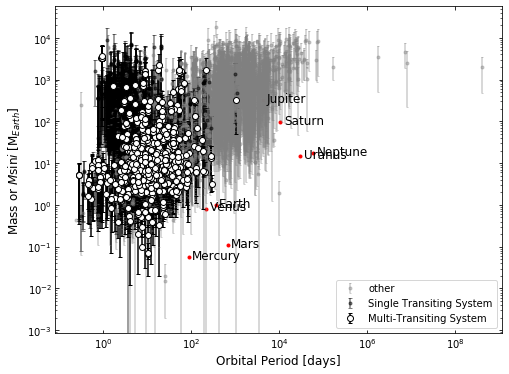

In [103]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log') 
ax.set_yscale('log')
plt.errorbar(data[other].pl_orbper,data[other].pl_bmasse,yerr=(data[other].pl_bmasse-data[other].pl_bmasseerr1,data[other].pl_bmasseerr2+data[other].pl_bmasse),fmt=".",color="grey",alpha=0.4,label="other",capsize=1)
plt.errorbar(data[single].pl_orbper,data[single].pl_bmasse,yerr=(data[single].pl_bmasse-data[single].pl_bmasseerr1,data[single].pl_bmasseerr2+data[single].pl_bmasse),fmt=".",color="black",alpha=0.5,label="Single Transiting System",capsize=2)
plt.errorbar(data[multi].pl_orbper,data[multi].pl_bmasse,yerr=(data[multi].pl_bmasse-data[multi].pl_bmasseerr1,data[multi].pl_bmasseerr2+data[multi].pl_bmasse),fmt="o",color="black",mfc="white",label="Multi-Transiting System",capsize=2)
plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
for i in range(len(ssplanets)):
    plt.text(1.2*ssper[i],0.9*(ssmass[i]/MEARTH),ssplanets[i],fontdict=font)
plt.legend(fontsize="medium")
plt.xlabel("Orbital Period [days]",fontsize='large')
plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
ax.minorticks_on()
#plt.errorbar(ttv.pl_orbper,ttv.pl_bmasse,ttv.pl_bmasseerr1,fmt=".",color="blue",alpha=0.25,label="TTV",capsize=3)

In [111]:
#orbital params
per=data['pl_orbper'] #days
sma=data['pl_orbsmax'] #AU
ecc=data['pl_orbeccen']
inc=data['pl_orbincl']
# planet params
mp_earth=data['pl_bmasse'] # M_earth
mp=data['pl_bmassj'] # M_jupiter
rp=data['pl_radj'] # R_jupiter
# stellar params
mstar=data['st_mass'] # M_sun
rstar=data['st_rad'] # R_sun
stype=data['st_spectype']
feh=data['st_met']
teff=data['st_teff']

MEARTH = 5.9742e24 #kg 
REARTH = 6.3781e6 #km
MJUP = 1.8986e27 #kg
RJUP = 6.9911e11 #km

# Solar System params
ssplanets=["Mercury", "Venus", "Earth", "Mars","Jupiter" ,"Saturn","Uranus","Neptune"]
ssshort=["Mer","V","E","M","J","S","U","N"]
ssmass = np.array([0.3302, 4.8685, 5.9736, 0.64185, 1898.6, 568.46, 86.832, 102.43]) * 10**24 #kg
ssper = np.array([88.0,224.7,365.2,687.0,4331,10747,30589,59800]) #days
ssecc= [0.205,0.007,0.017,0.094,0.049,0.057,0.046,0.011]
ssrad = [2439.7,6051.8,6371.00,3389.50,69911,58232,25362,24622] #km
ssrad_pm = [1.0,1.0,0.01,0.2,6,6,7,19]

In [97]:
multi=(data["sy_pnum"]> 1) & (data["discoverymethod"]== "Transit")
single=(data["sy_pnum"]== 1) & (data["discoverymethod"]== "Transit")
other=(data["discoverymethod"]!= "Transit")# (data["pl_discmethod"]== "Transit Timing Variations")
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12
        }
def plot_per_vs_mp():
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.errorbar(data[other].pl_orbper,data[other].pl_bmasse,yerr=(data[other].pl_bmasse-data[other].pl_bmasseerr1,data[other].pl_bmasseerr2+data[other].pl_bmasse),fmt=".",color="grey",alpha=0.2,label="Other Disc. Method",capsize=1)

#     plt.scatter(data[other].pl_orbper,data[other].pl_bmasse,label="Other Disc. Method",marker=".",color='gray',alpha=0.45)
#     plt.scatter(data[single].pl_orbper,data[single].pl_bmasse,label="Single Transiting System",marker=".",color="black")
#     plt.scatter(data[multi].pl_orbper,data[multi].pl_bmasse,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')

    plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
    plt.text(300,0.6,"Venus",fontdict=font)
    plt.text(480,0.88,"Earth",fontdict=font)
    plt.text(120,0.045,"Mercury",fontdict=font)
    plt.text(990,0.095,"Mars",fontdict=font)
    plt.text(5200,270,"Jupiter",fontdict=font)
    plt.text(14000,80,"Saturn",fontdict=font)
    plt.text(2800,13,"Uranus",fontdict=font)
    plt.text(81000,15,"Neptune",fontdict=font)
    plt.xlabel("Orbital Period [days]",fontsize='large')
    plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
    plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax.minorticks_on()
    plt.legend(loc=4,fontsize='medium')
    plt.show()

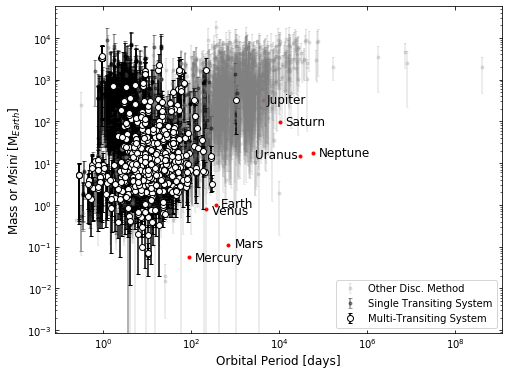

In [98]:
plot_per_vs_mp()

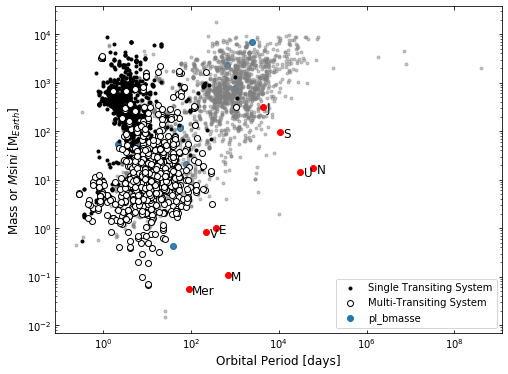

In [138]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log') 
ax.set_yscale('log')
x3=plt.scatter(ttv.pl_orbper,ttv.pl_bmasse,label="TTV",color=)
xo=plt.scatter(data[other].pl_orbper,data[other].pl_bmasse,label="Other",marker=".",color='gray',alpha=0.45)
x1=plt.scatter(data[single].pl_orbper,data[single].pl_bmasse,label="Single Transiting System",marker=".",color="black")
x2=plt.scatter(data[multi].pl_orbper,data[multi].pl_bmasse,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')
ss=plt.scatter(ssper,ssmass/MEARTH,marker="o",color="red",label="SS Planets")
for i in range(len(ssplanets)):
    plt.text(1.2*ssper[i],0.8*(ssmass[i]/MEARTH),ssshort[i],fontdict=font)
plt.xlabel("Orbital Period [days]",fontsize='large')
plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
ax.minorticks_on()
plt.legend(handles=[x1,x2,x3],loc=4,fontsize='medium')

In [ ]:
def plot_rp_vs_mp():
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.scatter(data[other].pl_radj,data[other].pl_bmassj,label="Other Disc. Method",marker=".",color='gray',alpha=0.45)
    plt.scatter(data[single].pl_radj,data[single].pl_bmassj,label="Single Transiting System",marker=".",color="black")
    plt.scatter(data[multi].pl_orbper,data[multi].pl_bmassj,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')
    plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
    # plt.text(300,0.6,"Venus",fontdict=font)
    # plt.text(480,0.88,"Earth",fontdict=font)
    # plt.text(120,0.045,"Mercury",fontdict=font)
    # plt.text(990,0.095,"Mars",fontdict=font)
    # plt.text(5200,270,"Jupiter",fontdict=font)
    # plt.text(14000,80,"Saturn",fontdict=font)
    # plt.text(2800,13,"Uranus",fontdict=font)
    # plt.text(81000,15,"Neptune",fontdict=font)
    plt.xlabel("Orbital Period [days]",fontsize='large')
    plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
    plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax.minorticks_on()
    plt.legend(loc=4,fontsize='medium')
    plt.show()